> # (Gemstone) 1인 가구의 최적 원룸 입지 추천을 위한 K-Means

## Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.cluster import KMeans

from matplotlib import font_manager, rc
%matplotlib inline
#%matplotlib notebook
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호도 표시

import folium

from sklearn import datasets

# 한글 깨짐 방지 목적 #
font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family = font_name)

# 경고 메시지 생략
import warnings
warnings.filterwarnings(action='ignore')

## 데이터

In [2]:
data = pd.read_csv('Data/df.csv', encoding='cp949')
data.columns = [
                '경도', '위도', 
                'CCTV', 'Subway', 'Accident', 'Travel', 'Estate', 'Service',
                'Retail', 'Hotel', 'Sports', 'Food', 'Medical', 'Education'
               ]
data.index = range(len(data))
data.head()

,경도,위도,CCTV,Subway,Accident,Travel,Estate,Service,Retail,Hotel,Sports,Food,Medical,Education
0,126.898944,37.435712,2,1,0,2,4,26,48,0,0,37,2,3
1,126.898944,37.445712,14,0,2,9,20,62,133,1,0,74,5,51
2,126.898944,37.455712,29,1,11,53,28,143,323,17,0,360,39,41
3,126.898944,37.465712,61,0,7,36,39,175,441,8,0,341,30,77
4,126.898944,37.475712,50,0,5,17,44,148,235,5,0,270,16,33


## 관심 지역 위치 확인 - (서울특별시 신림동 부근)

In [3]:
loclist = [list(i) for i in zip(data['위도'], data['경도'])]

m = folium.Map(location = [37.463654, 126.936092], zoom_start=13)
for j in loclist:
    folium.Marker(j).add_to(m)
m

## 위치 정보(위도, 경도)를 제외한 데이터셋 구성

In [4]:
feature = data[data.columns[2:]]
feature.head()

,CCTV,Subway,Accident,Travel,Estate,Service,Retail,Hotel,Sports,Food,Medical,Education
0,2,1,0,2,4,26,48,0,0,37,2,3
1,14,0,2,9,20,62,133,1,0,74,5,51
2,29,1,11,53,28,143,323,17,0,360,39,41
3,61,0,7,36,39,175,441,8,0,341,30,77
4,50,0,5,17,44,148,235,5,0,270,16,33


## 모델링

- K-Means (k=3)

In [5]:
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

r = pd.concat([feature, predict],axis=1)
result = pd.concat([data, predict],axis=1)

print(r)

    CCTV  Subway  Accident  Travel  Estate  Service  Retail  Hotel  Sports  \
0      2       1         0       2       4       26      48      0       0   
1     14       0         2       9      20       62     133      1       0   
2     29       1        11      53      28      143     323     17       0   
3     61       0         7      36      39      175     441      8       0   
4     50       0         5      17      44      148     235      5       0   
5     83       1         9      87      71      228     325      7       2   
6      7       0         0       3       3       16      24      0       0   
7     36       0         1       5       5       60      68      1       0   
8     46       0         0      26      26      147     263      0       0   
9     43       0         0       0      10       50      88      0       0   
10    43       0         1       3      24       76      91      2       0   
11    71       1         8      30      32      176     229     

## 예측된 클러스터에 따른 페어플롯

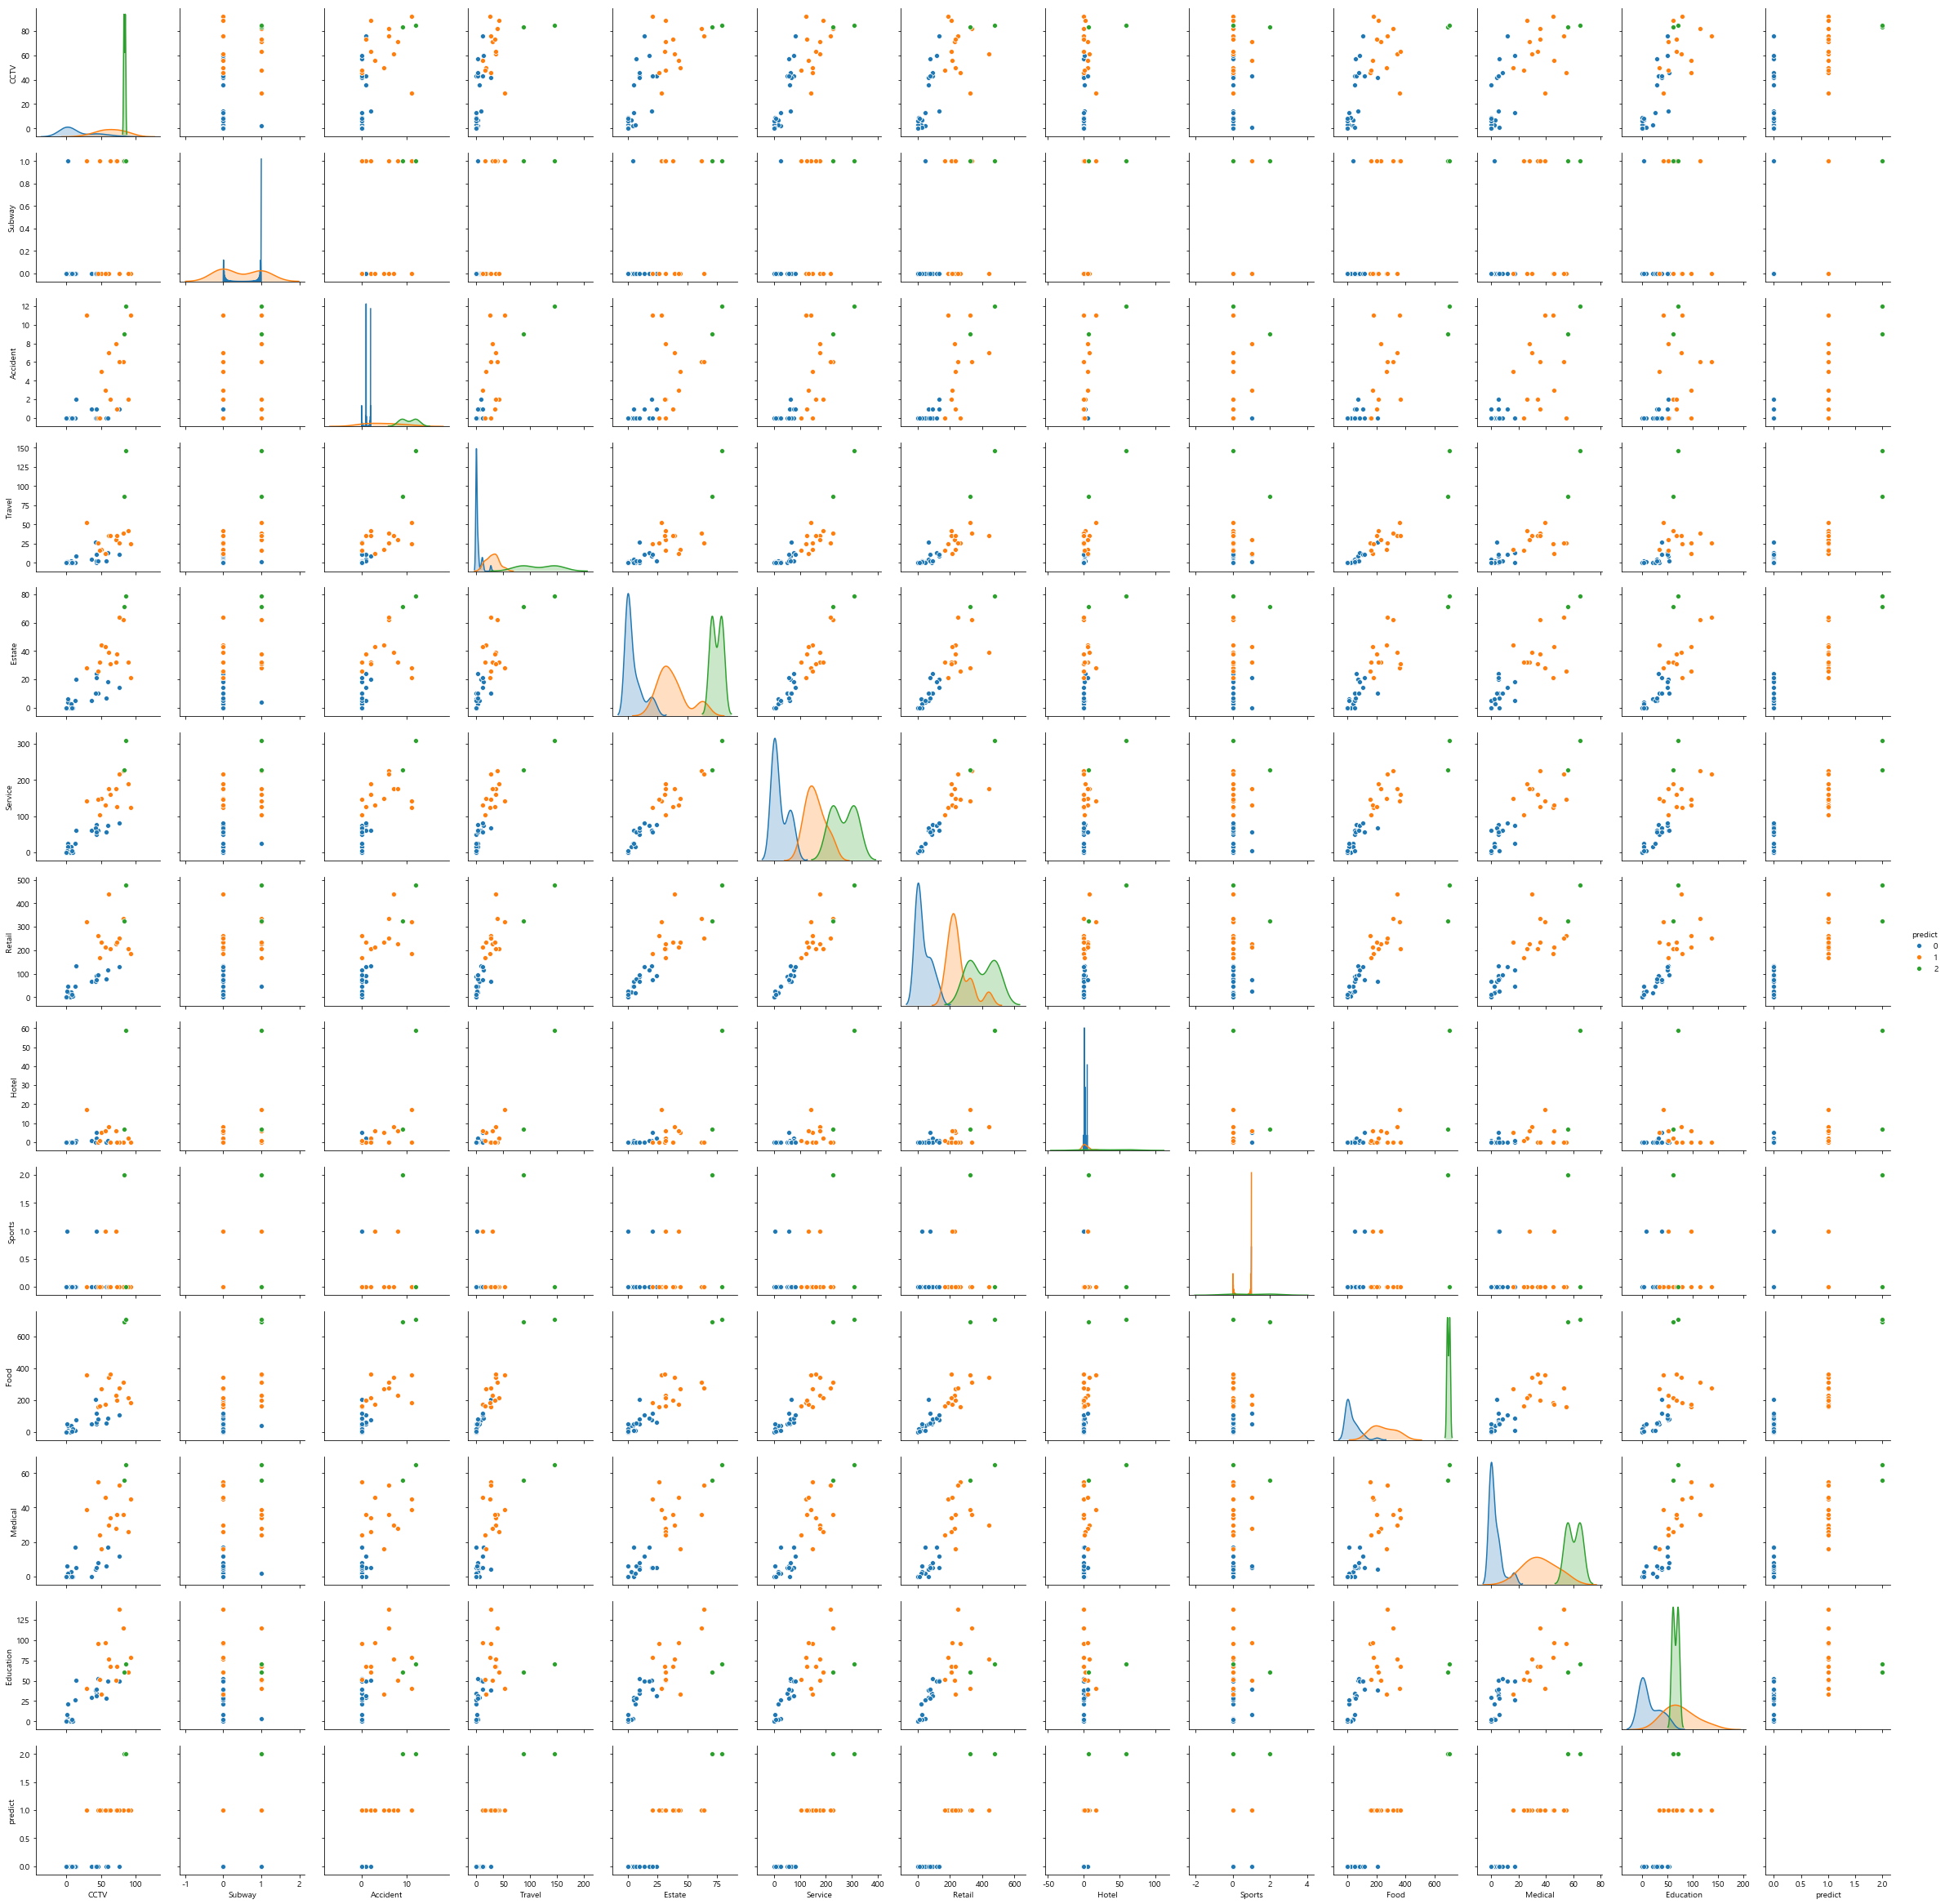

In [6]:
sns.pairplot(r,hue='predict')
plt.show()

## 3차원 시각화

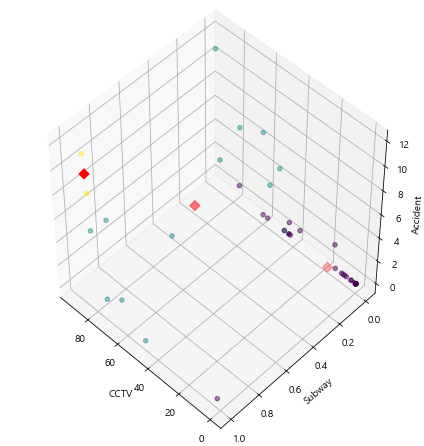

In [7]:
centers = pd.DataFrame(model.cluster_centers_,columns=data.columns[2:])
center_x = centers['CCTV']
center_y = centers['Subway']
center_z = centers['Accident']


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['CCTV'],r['Subway'],r['Accident'],c=r['predict'],alpha=0.5)
ax.scatter(center_x,center_y,center_z,s=50,marker='D',c='r')
ax.set_xlabel('CCTV')
ax.set_ylabel('Subway')
ax.set_zlabel('Accident')
plt.show()

## 클러스터 별 특성 확인

In [8]:
data.head()

,경도,위도,CCTV,Subway,Accident,Travel,Estate,Service,Retail,Hotel,Sports,Food,Medical,Education
0,126.898944,37.435712,2,1,0,2,4,26,48,0,0,37,2,3
1,126.898944,37.445712,14,0,2,9,20,62,133,1,0,74,5,51
2,126.898944,37.455712,29,1,11,53,28,143,323,17,0,360,39,41
3,126.898944,37.465712,61,0,7,36,39,175,441,8,0,341,30,77
4,126.898944,37.475712,50,0,5,17,44,148,235,5,0,270,16,33


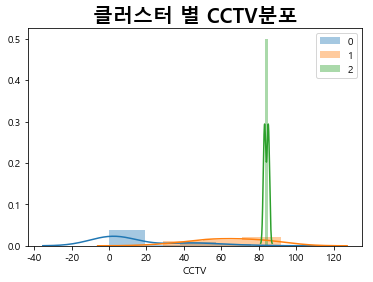

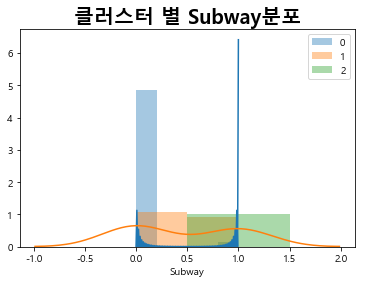

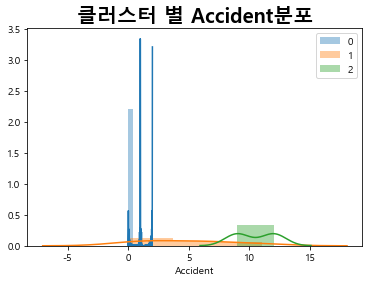

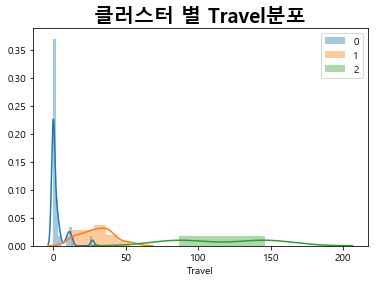

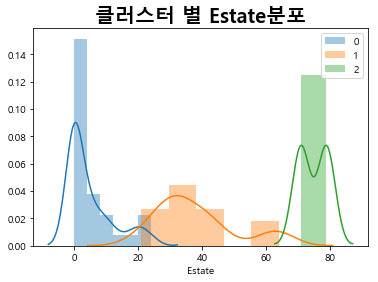

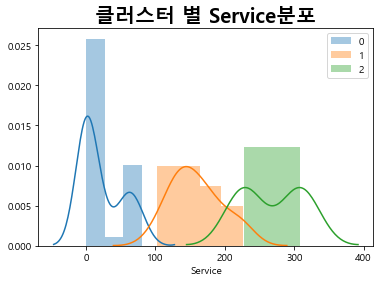

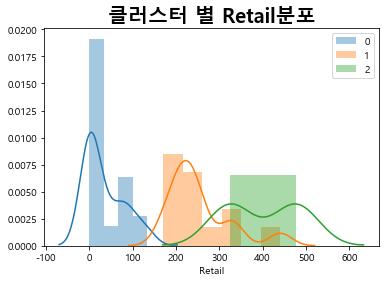

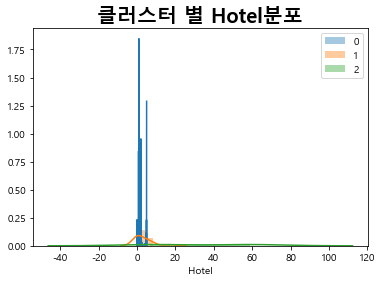

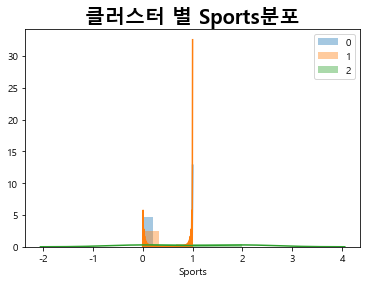

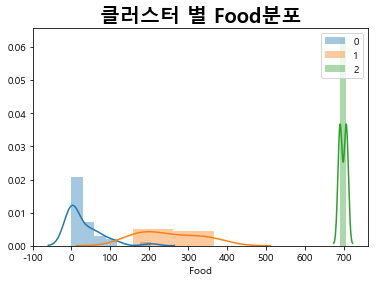

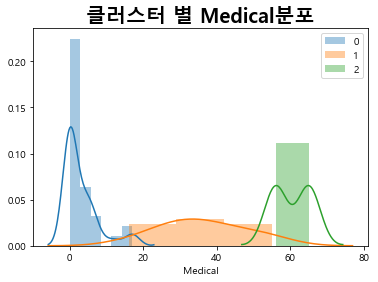

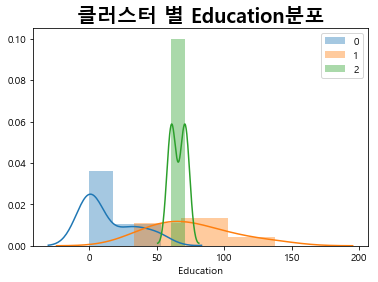

In [9]:
for var in data.columns[2:] : 

    plt.title('클러스터 별 ' + var + '분포', weight='bold', size=20)
    for i in range(3):
        sns.distplot(r[r['predict'] == i][var], label=str(i))
    plt.legend(loc = 'upper right')
    plt.show()

## 지도 상에서 분류된 클러스터 확인

In [10]:
loclist_0 = [list(i) for i in zip(result[result['predict']==0]['위도'], result[result['predict']==0]['경도'])]
loclist_1 = [list(i) for i in zip(result[result['predict']==1]['위도'], result[result['predict']==1]['경도'])]
loclist_2 = [list(i) for i in zip(result[result['predict']==2]['위도'], result[result['predict']==2]['경도'])]

m = folium.Map(location = [37.463654, 126.936092], zoom_start=13)

for j in loclist_0:
    folium.CircleMarker(j,color='blue', fill_color='blue').add_to(m)

for j in loclist_1:
    folium.CircleMarker(j,color='yellow', fill_color='yellow').add_to(m)

for j in loclist_2:
    folium.CircleMarker(j,color='green', fill_color='green').add_to(m)

    
m